# TP02 - HISTOGRAMAS, KERNELS & MÉTODOS NO SUPERVISADOS USANDO LA EPH – [Taller de Programación]
## Alumnos:  Kostzer Federico - Meza Palma Manuel Humberto - Pardini Maximiliano Gabriel - 
## Fecha: 22/10/2025

Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final

In [8]:
## Librerias a utlizar

import numpy as np
import pandas as pd

In [ ]:

# ------------------------------
# Cargar la base hogares_final_unida
# ------------------------------

ruta_hogares = r'..\TP02\hogares_final_unida.csv'
hogares_final_unida = pd.read_csv(ruta_hogares, low_memory=False)

# Verificación rápida
print(f"Dimensiones de la base: {hogares_final_unida.shape}")
print(hogares_final_unida.head())



Dimensiones de la base: (23838, 357)
   v2_01  v22_03  v22_02  v21_03  v21_02  v5_01  vii2_4  vii2_3  vii2_2  \
0    NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
1    NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
2    NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
3    NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   
4    NaN     NaN     NaN     NaN     NaN    NaN     NaN     NaN     NaN   

   vii2_1  ...  adecifr_hogar  ipcf_hogar  deccfr_hogar  ideccfr_hogar  \
0     NaN  ...            NaN         NaN           NaN            NaN   
1     NaN  ...            NaN         NaN           NaN            NaN   
2     NaN  ...            NaN         NaN           NaN            NaN   
3     NaN  ...            NaN         NaN           NaN            NaN   
4     NaN  ...            NaN         NaN           NaN            NaN   

   rdeccfr_hogar  gdeccfr_hogar  pdeccfr_hogar  adeccfr_hogar  pond

1. 	Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones). 

✅ Variable 'edad2' creada correctamente y guardada en el DataFrame.

count    23569.000000
mean      1740.804277
std       1851.151661
min          1.000000
25%        256.000000
50%       1024.000000
75%       2704.000000
max       9409.000000
Name: edad2, dtype: float64

📊 Estadísticas generales de edad:
count    23569.000000
mean        35.231363
std         22.351208
min          1.000000
25%         16.000000
50%         32.000000
75%         52.000000
max         97.000000
Name: ch06, dtype: float64

📈 Estadísticas de edad por condición de pobreza:
         count       mean        std  min   25%   50%   75%   max
pobre                                                            
0      20721.0  36.727330  22.439504  1.0  18.0  34.0  54.0  97.0
1       2848.0  24.347261  18.335108  1.0  10.0  18.0  37.0  90.0

📉 Conteo por grupo pobre/no pobre:
pobre
0    20928
1     2910
Name: count, dtype: int64


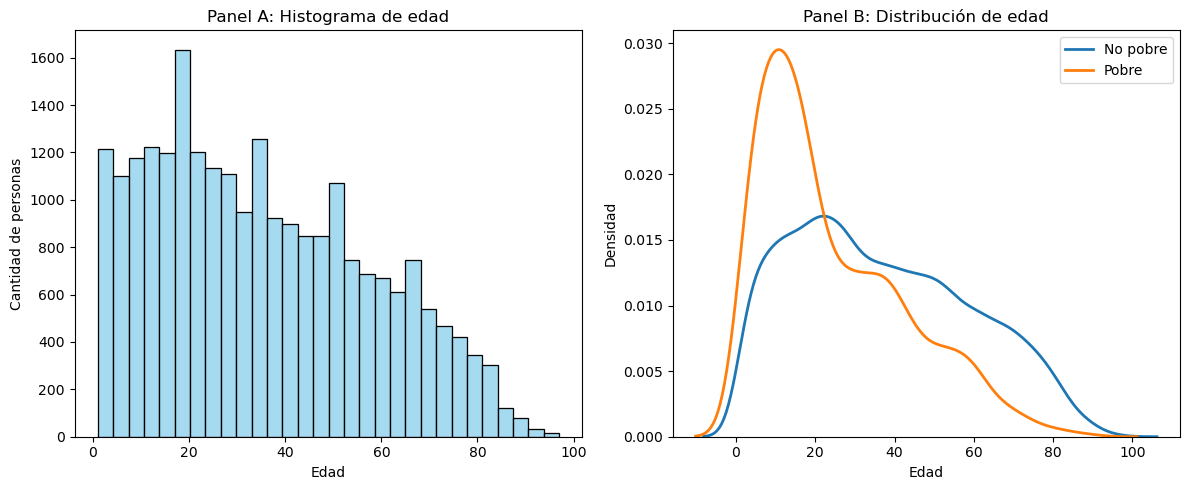

In [12]:
# ------------------------------
# Paso 1: Crear variable edad2 (edad al cuadrado)
# ------------------------------

# Asegurar que ch06 (edad) sea numérica
hogares_final_unida['ch06'] = pd.to_numeric(hogares_final_unida['ch06'], errors='coerce')

# Reemplazar edades negativas con NaN
hogares_final_unida.loc[hogares_final_unida['ch06'] < 0, 'ch06'] = pd.NA

# Crear edad² directamente en el DataFrame principal
hogares_final_unida['edad2'] = hogares_final_unida['ch06'] ** 2

# Verificar creación
if 'edad2' in hogares_final_unida.columns:
    print("✅ Variable 'edad2' creada correctamente y guardada en el DataFrame.\n")
    print(hogares_final_unida['edad2'].describe())
else:
    print("❌ Error: no se creó la variable 'edad2'.")

# ------------------------------
# Paso 2: Estadísticas descriptivas
# ------------------------------

print("\n📊 Estadísticas generales de edad:")
print(hogares_final_unida['ch06'].describe())

if 'pobre' in hogares_final_unida.columns:
    print("\n📈 Estadísticas de edad por condición de pobreza:")
    print(hogares_final_unida.groupby('pobre')['ch06'].describe())

    print("\n📉 Conteo por grupo pobre/no pobre:")
    print(hogares_final_unida['pobre'].value_counts())
else:
    print("\n⚠️ No se encontró la variable 'pobre' en la base. Solo se mostrarán estadísticas generales.")

# ------------------------------
# Paso 3: Gráficos exploratorios
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Panel A: Histograma de edad
plt.subplot(1,2,1)
sns.histplot(hogares_final_unida['ch06'].dropna(), bins=30, color='skyblue', kde=False)
plt.title('Panel A: Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')

# Panel B: Distribución kernel por condición de pobreza (solo si existe)
plt.subplot(1,2,2)
if 'pobre' in hogares_final_unida.columns:
    sns.kdeplot(data=hogares_final_unida[hogares_final_unida['pobre']==0], x='ch06', label='No pobre', linewidth=2)
    sns.kdeplot(data=hogares_final_unida[hogares_final_unida['pobre']==1], x='ch06', label='Pobre', linewidth=2)
    plt.legend()
else:
    sns.kdeplot(data=hogares_final_unida, x='ch06', linewidth=2, color='gray', label='Edad')

plt.title('Panel B: Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

2. Cree la variable educ definida como la cantidad de años de educación. Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el último año que aprobó (CH14) fue “sexto”, entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

In [7]:
## Revisar valores de anios de educacion // Variables ch12 ch13 y ch14

for col in ['ch12', 'ch13', 'ch14']:
    print(f"\n🔹 {col}")
    print(hogares_final_unida[col].value_counts(dropna=False))



🔹 ch12
ch12
Primario                              3556
Secundario                            3339
4                                     3152
EGB                                   2403
2                                     2048
Universitario                         2043
7                                     1479
0.0                                   1000
Terciario                              913
6                                      898
Polimodal                              743
3                                      562
5                                      508
Jardín/Preescolar                      396
0                                      319
1                                      249
8                                       86
9                                       56
Educación especial (discapacitado)      49
Posgrado Universitario                  37
Ns./Nr.                                  2
Name: count, dtype: int64

🔹 ch13
ch13
No         7492
Sí         5987
2          46

In [12]:
## Recodificar variables de educacion
## Diccionarios de recodificacion
# --- ch12 ---
map_ch12 = {
    'Jardín/Preescolar': 1,
    'Primario': 2,
    'EGB': 3,
    'Secundario': 4,
    'Polimodal': 5,
    'Terciario': 6,
    'Universitario': 7,
    'Posgrado Universitario': 8,
    'Educación especial (discapacitado)': 9
}

# --- ch13 ---
map_ch13 = {
    'Sí': 1,
    'No': 2,
    'Ns./Nr.': 9
}

# --- ch14 ---
map_ch14 = {
    '00': 0,
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '98': 98,
    '99': 99
}

## Aplicar recodifcicacion creando tres nuevas variables ch12_rec ch13_rec ch14_rec
# Recodificar ch12
hogares_final_unida['ch12_rec'] = hogares_final_unida['ch12'].replace(map_ch12)

# Recodificar ch13
hogares_final_unida['ch13_rec'] = hogares_final_unida['ch13'].replace(map_ch13)

# Recodificar ch14
hogares_final_unida['ch14_rec'] = hogares_final_unida['ch14'].replace(map_ch14)

## Forzar a NaN los valores residuales en ch12 y ch13
hogares_final_unida['ch12_rec'] = hogares_final_unida['ch12_rec'].where(~hogares_final_unida['ch12'].isin(['0', '0.0', 0, 'Ns./Nr.']), np.nan)
hogares_final_unida['ch13_rec'] = hogares_final_unida['ch13_rec'].where(~hogares_final_unida['ch13'].isin(['0', '0.0', 0, 'Ns./Nr.']), np.nan)

## Unificar a valores numericos las categorias
# --- ch12_rec ---
hogares_final_unida['ch12_rec'] = (
    pd.to_numeric(hogares_final_unida['ch12_rec'], errors='coerce')  # convierte strings a números, deja NaN si no puede
    .astype('Int64')                                # tipo entero que acepta NaN
)

# --- ch13_rec ---
hogares_final_unida['ch13_rec'] = (
    pd.to_numeric(hogares_final_unida['ch13_rec'], errors='coerce')
    .astype('Int64')
)

# --- ch14_rec ---
hogares_final_unida['ch14_rec'] = (
    pd.to_numeric(hogares_final_unida['ch14_rec'], errors='coerce')
    .astype('Int64')
)


## Verificar la recodificacion

for col in ['ch12_rec', 'ch13_rec', 'ch14_rec']:
    print(f"\n🔹 {col}")
    print(hogares_final_unida[col].value_counts(dropna=False))



🔹 ch12_rec
ch12_rec
4       6491
2       5604
7       3522
3       2965
6       1811
<NA>    1321
5       1251
1        645
8        123
9        105
Name: count, dtype: Int64

🔹 ch13_rec
ch13_rec
2       12180
1       10337
<NA>     1321
Name: count, dtype: Int64

🔹 ch14_rec
ch14_rec
<NA>    11657
2        2440
3        2315
1        1786
0        1751
4        1424
5         936
6         583
8         368
7         342
99        112
98         72
9          52
Name: count, dtype: Int64


✅ Variable 'educ' creada correctamente y guardada en el DataFrame.

count    22517.000000
mean         6.099525
std          4.726749
min          0.000000
25%          2.000000
50%          6.000000
75%         10.000000
max         18.000000
Name: educ, dtype: float64


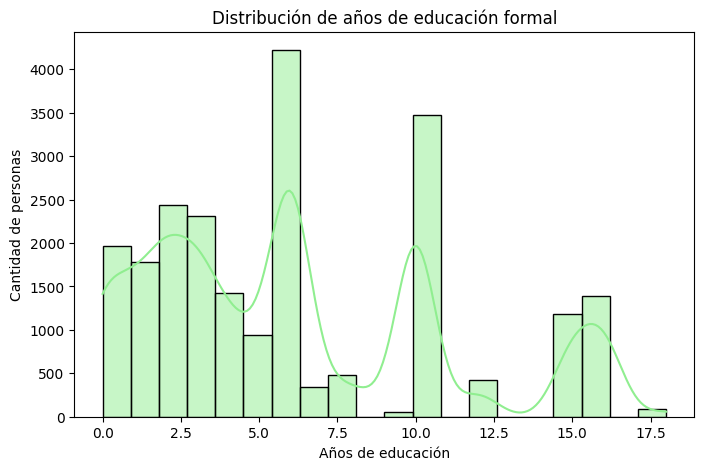

In [13]:
# ===============================================================
# 2️⃣ Creación de la variable 'educ' (años de educación formal)
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Paso 1: Mapear CH14 (último año aprobado)
def map_ch14(x):
    if pd.isna(x) or x in [98, 99]:
        return 0
    else:
        return int(x)

hogares_final_unida['ch14_anos'] = hogares_final_unida['ch14_rec'].apply(map_ch14)

# Paso 3: Definir años base por nivel educativo (CH12)
nivel_base = {
    1: 0,   # Jardín / preescolar
    2: 6,   # Primario
    3: 8,   # EGB
    4: 10,  # Secundario
    5: 12,  # Polimodal
    6: 15,  # Terciario
    7: 16,  # Universitario
    8: 18,  # Posgrado
    9: 0    # Educación especial
}

# Paso 4: Calcular años totales de educación (educ)
def calcular_educ(row):
    ch12_rec = row['ch12_rec']
    ch13_rec = row['ch13_rec']
    ch14_anos = row['ch14_anos']
    if pd.isna(ch12_rec) or ch12_rec not in nivel_base:
        return pd.NA
    base = nivel_base[ch12_rec]
    if ch13_rec == 1:        # Si finalizó el nivel
        return base
    elif ch13_rec == 2:      # Si no lo finalizó
        return ch14_anos
    else:
        return pd.NA

hogares_final_unida['educ'] = hogares_final_unida.apply(calcular_educ, axis=1)

# Paso 5: Asegurar que 'educ' sea numérica
hogares_final_unida['educ'] = pd.to_numeric(hogares_final_unida['educ'], errors='coerce')

# Paso 5 bis: Verificar creación de 'educ'
if 'educ' in hogares_final_unida.columns:
    print("✅ Variable 'educ' creada correctamente y guardada en el DataFrame.\n")
    print(hogares_final_unida['educ'].describe())
else:
    print("❌ Error: no se creó la variable 'educ'.")

# Paso 6: Visualización — Histograma con densidad
plt.figure(figsize=(8,5))
sns.histplot(hogares_final_unida['educ'].dropna(), bins=20, kde=True, color='lightgreen')
plt.title('Distribución de años de educación formal')
plt.xlabel('Años de educación')
plt.ylabel('Cantidad de personas')
plt.show()


3. Actualice la variable ingreso_total_familiar con el total de ingresos habituales (ITF). Recuerde que los pesos de 2005 tienen un poder de compra distinto a los pesos de 2025 en el primer trimestre. Convierta primero los ingresos de 2005 a pesos de 2025. Similar al ítem 1, presente en un panel A, un histograma de la variable ingreso_total_familiar y las distribuciones de kernels para pobres y no pobres en un panel B. Comente brevemente la distribución de ingresos en estos dos panels (3-4 oraciones). En cada panel, sume una linea vertical con la línea de la pobreza calculada en el TP1.

✅ Variable 'itf_ajustado' creada correctamente y guardada en el DataFrame.

count    2.383800e+04
mean     9.264821e+05
std      1.020160e+06
min      8.496000e+03
25%      3.228480e+05
50%      6.372000e+05
75%      1.180000e+06
max      2.600000e+07
Name: itf_ajustado, dtype: float64


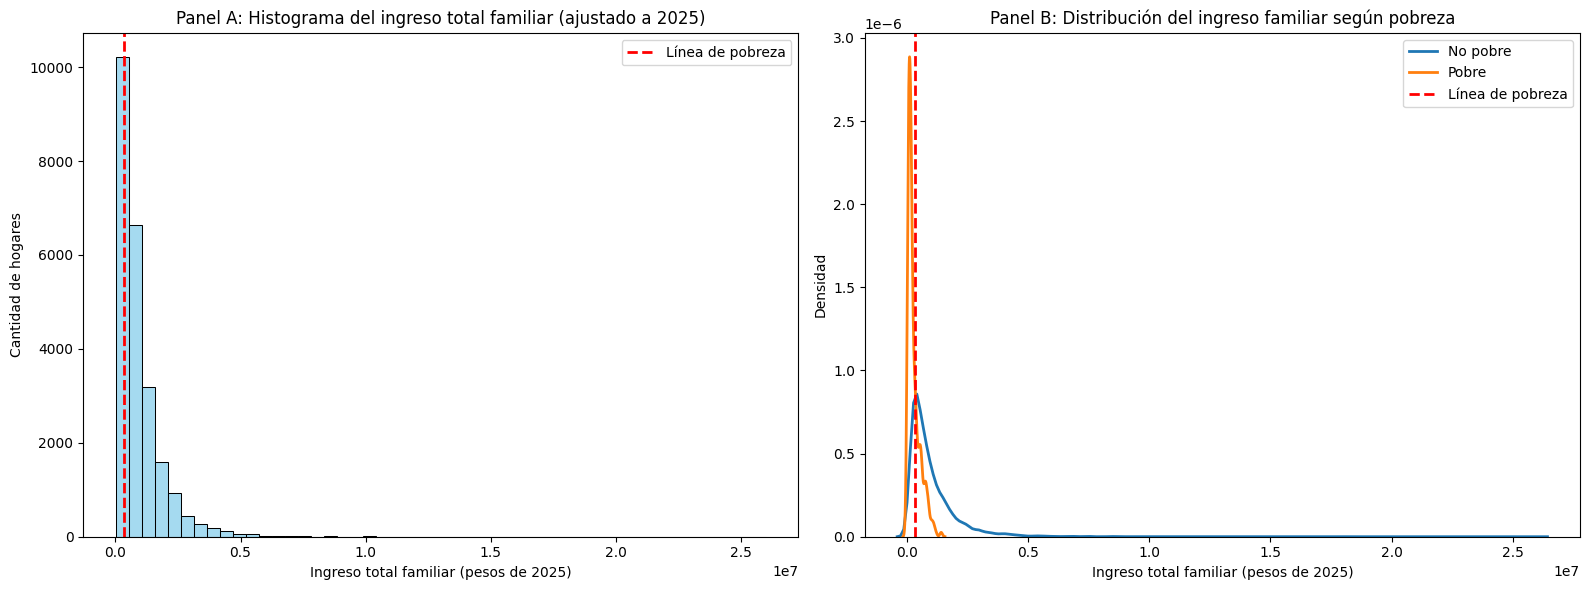

In [14]:
# ===============================================================
# 3️⃣ Actualización del ingreso total familiar (ITF) a precios de 2025
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Asegurar que las variables sean numéricas
hogares_final_unida['itf'] = pd.to_numeric(hogares_final_unida['itf'], errors='coerce')
hogares_final_unida['ano4'] = pd.to_numeric(hogares_final_unida['ano4'], errors='coerce')
hogares_final_unida['pobre'] = pd.to_numeric(hogares_final_unida['pobre'], errors='coerce')

# Paso 2: Ajustar ingresos de 2005 a pesos de 2025
coef_ajuste_2005_2025 = 424.8
hogares_final_unida['itf_ajustado'] = hogares_final_unida.apply(
    lambda x: x['itf'] * coef_ajuste_2005_2025 if x['ano4'] == 2005 else x['itf'],
    axis=1
)

# Paso 3: Calcular línea de pobreza en pesos de 2025
linea_pobreza_2005 = hogares_final_unida.loc[hogares_final_unida['ano4'] == 2005, 'itf_ajustado'].quantile(0.1229)
linea_pobreza_2025 = hogares_final_unida.loc[hogares_final_unida['ano4'] == 2025, 'itf_ajustado'].quantile(0.1199)
linea_pobreza = (linea_pobreza_2005 + linea_pobreza_2025) / 2  # promedio para mostrar en gráfico

# Paso 4: Verificar creación de la variable
if 'itf_ajustado' in hogares_final_unida.columns:
    print("✅ Variable 'itf_ajustado' creada correctamente y guardada en el DataFrame.\n")
    print(hogares_final_unida['itf_ajustado'].describe())
else:
    print("❌ Error: no se creó la variable 'itf_ajustado'.")

# Paso 5: Visualización
plt.figure(figsize=(16,6))

# Panel A: Histograma
plt.subplot(1,2,1)
sns.histplot(hogares_final_unida['itf_ajustado'].dropna(), bins=50, color='skyblue', kde=False)
plt.axvline(linea_pobreza, color='red', linestyle='--', linewidth=2, label='Línea de pobreza')
plt.title('Panel A: Histograma del ingreso total familiar (ajustado a 2025)')
plt.xlabel('Ingreso total familiar (pesos de 2025)')
plt.ylabel('Cantidad de hogares')
plt.legend()

# Panel B: KDE por pobreza
plt.subplot(1,2,2)
sns.kdeplot(data=hogares_final_unida[hogares_final_unida['pobre'] == 0], x='itf_ajustado', label='No pobre', linewidth=2)
sns.kdeplot(data=hogares_final_unida[hogares_final_unida['pobre'] == 1], x='itf_ajustado', label='Pobre', linewidth=2)
plt.axvline(linea_pobreza, color='red', linestyle='--', linewidth=2, label='Línea de pobreza')
plt.title('Panel B: Distribución del ingreso familiar según pobreza')
plt.xlabel('Ingreso total familiar (pesos de 2025)')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


4.	Para el jefe del hogar, cree la variable horastrab como el total de horas trabajadas como la suma de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT + PP3F_TOT). Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

📊 Estadísticas descriptivas de 'horastrab':
count    23838.000000
mean        15.449618
std         32.486913
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       1998.000000
Name: horastrab, dtype: float64


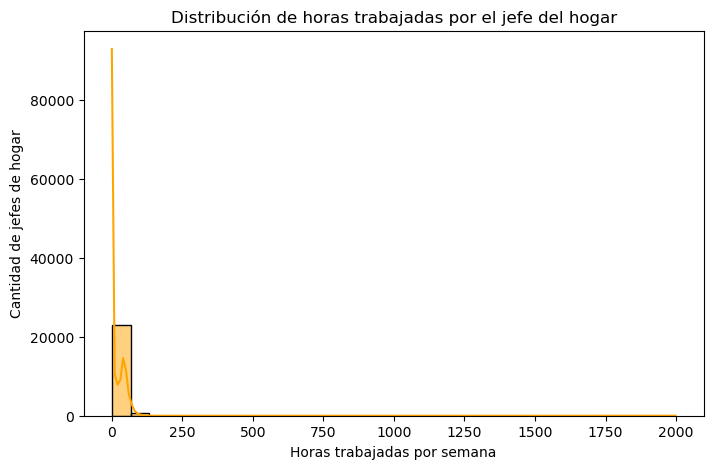

✅ Variable 'horastrab' creada correctamente y guardada en el DataFrame.

count    23838.000000
mean        15.449618
std         32.486913
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       1998.000000
Name: horastrab, dtype: float64


In [15]:
# ===============================================================
# 4️⃣ Crear variable 'horastrab' (total de horas trabajadas por el jefe del hogar)
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: asegurar que las variables de horas sean numéricas
hogares_final_unida['pp3e_tot'] = pd.to_numeric(hogares_final_unida['pp3e_tot'], errors='coerce')
hogares_final_unida['pp3f_tot'] = pd.to_numeric(hogares_final_unida['pp3f_tot'], errors='coerce')

# Paso 2: crear variable 'horastrab' como suma de horas ocupación principal y otras ocupaciones
hogares_final_unida['horastrab'] = hogares_final_unida['pp3e_tot'].fillna(0) + hogares_final_unida['pp3f_tot'].fillna(0)

# Paso 3: estadísticas descriptivas de 'horastrab'
horastrab_stats = hogares_final_unida['horastrab'].describe()
print("📊 Estadísticas descriptivas de 'horastrab':")
print(horastrab_stats)

# Paso 4: visualización
plt.figure(figsize=(8,5))
sns.histplot(hogares_final_unida['horastrab'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribución de horas trabajadas por el jefe del hogar')
plt.xlabel('Horas trabajadas por semana')
plt.ylabel('Cantidad de jefes de hogar')
plt.show()

# Paso 5: verificación de creación y guardado en el DataFrame
if 'horastrab' in hogares_final_unida.columns:
    print("✅ Variable 'horastrab' creada correctamente y guardada en el DataFrame.\n")
    print(hogares_final_unida['horastrab'].describe())
else:
    print("❌ Error: no se creó la variable 'horastrab'.")


5.	¿Cuál es el tamaño de la de la base de datos para su región con las variables originales unificadas? Para ello complete la tabla 1 que se le diseña abajo y comente.

In [16]:
import pandas as pd

# ------------------------------
# Paso 1: Verificar años y NAs en pobre
# ------------------------------
print("Valores únicos de año:", hogares_final_unida['ano4'].unique())
print("Valores únicos de pobre:", hogares_final_unida['pobre'].unique())

# ------------------------------
# Paso 2: Cantidad de observaciones por año
# ------------------------------
obs_2005 = hogares_final_unida[hogares_final_unida['ano4'] == 2005].shape[0]
obs_2025 = hogares_final_unida[hogares_final_unida['ano4'] == 2025].shape[0]
obs_total = hogares_final_unida.shape[0]

# Cantidad de NAs en 'pobre' por año
na_pobre_2005 = hogares_final_unida[(hogares_final_unida['ano4']==2005) & (hogares_final_unida['pobre'].isna())].shape[0]
na_pobre_2025 = hogares_final_unida[(hogares_final_unida['ano4']==2025) & (hogares_final_unida['pobre'].isna())].shape[0]

# Cantidad de pobres y no pobres por año
pobres_2005 = hogares_final_unida[(hogares_final_unida['ano4']==2005) & (hogares_final_unida['pobre']==1)].shape[0]
nopobres_2005 = hogares_final_unida[(hogares_final_unida['ano4']==2005) & (hogares_final_unida['pobre']==0)].shape[0]

pobres_2025 = hogares_final_unida[(hogares_final_unida['ano4']==2025) & (hogares_final_unida['pobre']==1)].shape[0]
nopobres_2025 = hogares_final_unida[(hogares_final_unida['ano4']==2025) & (hogares_final_unida['pobre']==0)].shape[0]

# Cantidad de variables limpias (columnas actuales de la base)
cant_vars = hogares_final_unida.shape[1]

# ------------------------------
# Paso 3: Crear Tabla 1
# ------------------------------
tabla1 = pd.DataFrame({
    '2005': [obs_2005, na_pobre_2005, pobres_2005, nopobres_2005, cant_vars],
    '2025': [obs_2025, na_pobre_2025, pobres_2025, nopobres_2025, cant_vars],
    'Total': [obs_total, na_pobre_2005 + na_pobre_2025, pobres_2005 + pobres_2025, nopobres_2005 + nopobres_2025, cant_vars]
}, index=[
    'Cantidad observaciones',
    'Cantidad de observaciones con NAs en la variable "pobre"',
    'Cantidad de Pobres',
    'Cantidad de No Pobres',
    'Cantidad de variables limpias y homogeneizadas'
])

# ------------------------------
# Paso 4: Imprimir tabla
# ------------------------------
print(tabla1)


Valores únicos de año: [2005. 2025.]
Valores únicos de pobre: [0 1]
                                                     2005  2025  Total
Cantidad observaciones                              14481  9357  23838
Cantidad de observaciones con NAs en la variabl...      0     0      0
Cantidad de Pobres                                   1780  1130   2910
Cantidad de No Pobres                               12701  8227  20928
Cantidad de variables limpias y homogeneizadas        362   362    362


Parte II: Métodos No Supervisados

Esta parte del trabajo práctico tiene como objetivo que realicen un análisis visual de los datos utilizando las herramientas vistas en clase. En esta parte, solo necesita utilizar las variables: edad, edad2, educ, ingreso_total_familiar (ITF), el número de miembros en el hogar (2005=IX_TOT y 2025=IX_Tot) y horastrab. 
1.	Realice una matriz de correlaciones con estos seis predictores para su región y comente los resultados.


Filas con datos completos: 9038
📊 Matriz de correlaciones:
                  ch06     edad2      educ  itf_ajustado    ix_tot  horastrab
ch06          1.000000  0.967356  0.352172     -0.038585 -0.423253   0.091042
edad2         0.967356  1.000000  0.258182     -0.062446 -0.415439  -0.042694
educ          0.352172  0.258182  1.000000      0.179961 -0.210362   0.271368
itf_ajustado -0.038585 -0.062446  0.179961      1.000000  0.133649   0.173985
ix_tot       -0.423253 -0.415439 -0.210362      0.133649  1.000000  -0.082108
horastrab     0.091042 -0.042694  0.271368      0.173985 -0.082108   1.000000


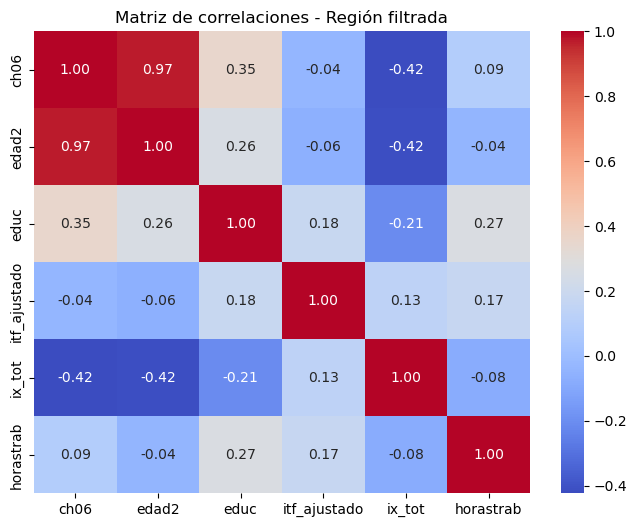

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de interés
variables_interes = ['ch06', 'edad2', 'educ', 'itf_ajustado', 'ix_tot', 'horastrab']

# Filtrar solo filas con datos completos
df_completo = hogares_final_unida[variables_interes].dropna()

# Revisar cuántas filas quedaron
print(f"Filas con datos completos: {df_completo.shape[0]}")

# Crear matriz de correlaciones
correlacion = df_completo.corr()

print("📊 Matriz de correlaciones:")
print(correlacion)

# Visualización
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de correlaciones - Región filtrada')
plt.show()


A.	PCA

2.	PCA con ingreso: Apliquen PCA a las seis variables seleccionadas para esta parte. Recuerde primero estandarizar las variables como vimos en la tutorial. En un gráfico de dispersión muestren los índices (scores) calculados del primer y segundo componente de PCA y comente los resultados. 

Filas utilizadas para PCA: 9038

📊 Varianza explicada por cada componente:
PC1: 40.50%
PC2: 22.79%


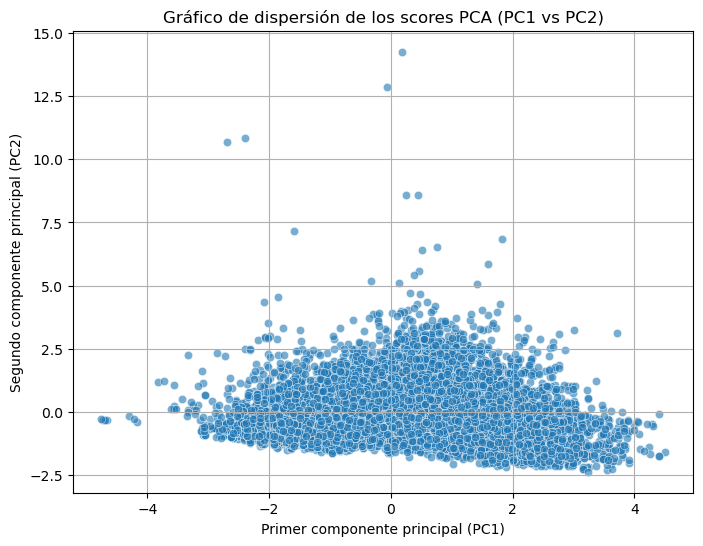

In [18]:
# ===============================================================
# 5️⃣ PCA sobre las variables de interés
# ===============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selección de variables
vars_pca = ['ch06', 'edad2', 'educ', 'itf_ajustado', 'ix_tot', 'horastrab']

# Filtrar filas sin NA en estas variables
df_pca = hogares_final_unida[vars_pca].dropna()
print(f"Filas utilizadas para PCA: {len(df_pca)}")

# Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(X_scaled)

# Crear DataFrame con scores
df_scores = pd.DataFrame(pca_scores, columns=['PC1', 'PC2'])

# Mostrar varianza explicada
print("\n📊 Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

# Gráfico de dispersión de los scores
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_scores, alpha=0.6)
plt.title('Gráfico de dispersión de los scores PCA (PC1 vs PC2)')
plt.xlabel('Primer componente principal (PC1)')
plt.ylabel('Segundo componente principal (PC2)')
plt.grid(True)
plt.show()


3.	Grafique con flechas los ponderadores (loading) de PCA para el primer y segundo componente y comente los pesos que que le dan a cada variable utilizada. 

📊 Loadings de cada variable en PC1 y PC2:
                   PC1       PC2
ch06          0.606684 -0.080431
edad2         0.586773 -0.184273
educ          0.331918  0.469160
itf_ajustado -0.025595  0.598861
ix_tot       -0.407321  0.114813
horastrab     0.104386  0.606339


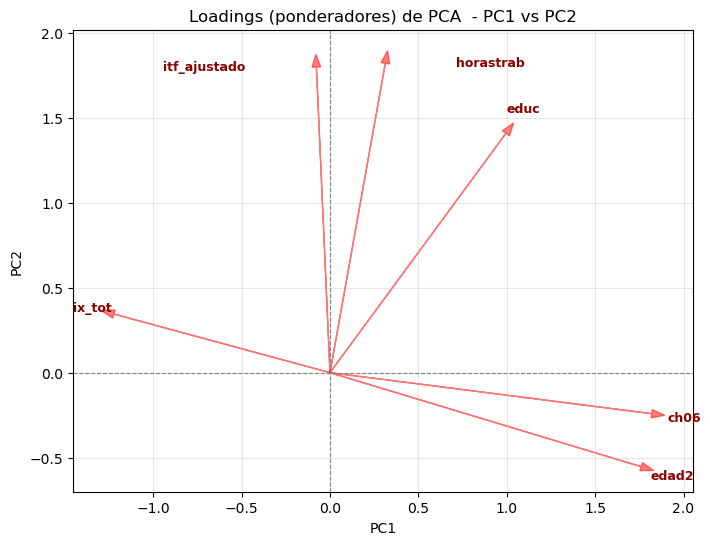

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener loadings
loadings = pca.components_.T  # columnas: PC1 y PC2
loading_df = pd.DataFrame(loadings, index=vars_pca, columns=['PC1', 'PC2'])
print("📊 Loadings de cada variable en PC1 y PC2:")
print(loading_df)

plt.figure(figsize=(8, 6))
plt.title("Loadings (ponderadores) de PCA  - PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

scale_factor = 3

# Flechas y etiquetas de las variables
for i, var in enumerate(loading_df.index):
    x = loading_df.PC1.iloc[i] * scale_factor
    y = loading_df.PC2.iloc[i] * scale_factor
    plt.arrow(0, 0, x, y, color="red", alpha=0.5, head_width=0.05)
    
    # Ajuste manual
    if var == "itf_ajustado":
        plt.text(x - 0.4, y, var, color="darkred", ha="right", va="center", fontsize=9, fontweight="bold")
    elif var == "horastrab":
        plt.text(x + 0.4, y, var, color="darkred", ha="left", va="center", fontsize=9, fontweight="bold")
    else:
        plt.text(x * 1.1, y * 1.1, var, color="darkred", ha="center", va="center", fontsize=9, fontweight="bold")

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3)
plt.show()


4.	Finalmente, grafique la proporción de la varianza explicada para cada uno de los seis componentes y comente el gráfico. 

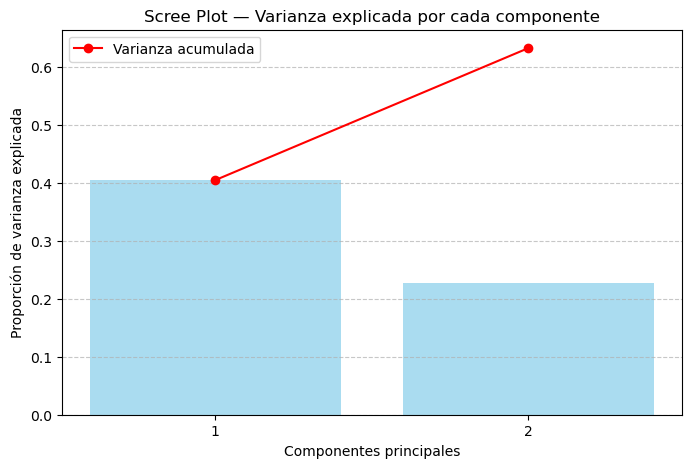

PC1: 0.4050 (40.50%)
PC2: 0.2279 (22.79%)

📌 Varianza acumulada con los primeros dos componentes: 0.6328 (63.28%)


In [20]:
# ===============================================================
# Scree plot — proporción de varianza explicada
# ===============================================================

import matplotlib.pyplot as plt
import numpy as np

# Obtener varianza explicada
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
components = np.arange(1, len(explained_var_ratio)+1)
plt.bar(components, explained_var_ratio, alpha=0.7, color='skyblue')
plt.plot(components, np.cumsum(explained_var_ratio), marker='o', color='red', label='Varianza acumulada')
plt.xticks(components)
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Scree Plot — Varianza explicada por cada componente')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Imprimir varianza explicada para comentar
for i, ratio in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
    
print(f"\n📌 Varianza acumulada con los primeros dos componentes: {np.cumsum(explained_var_ratio)[1]:.4f} ({np.cumsum(explained_var_ratio)[1]*100:.2f}%)")


B.	Cluster

5. Cluster k-medias: 

a. Corran el algoritmo con k=2, k=4 y k=10 usando n_init = 20, y grafiquen los resultados usando edad e ingreso familiar. Interprétenlos ¿Puede el algoritmo con k=2 separar correctamente a las personas pobres y no pobres en su región?


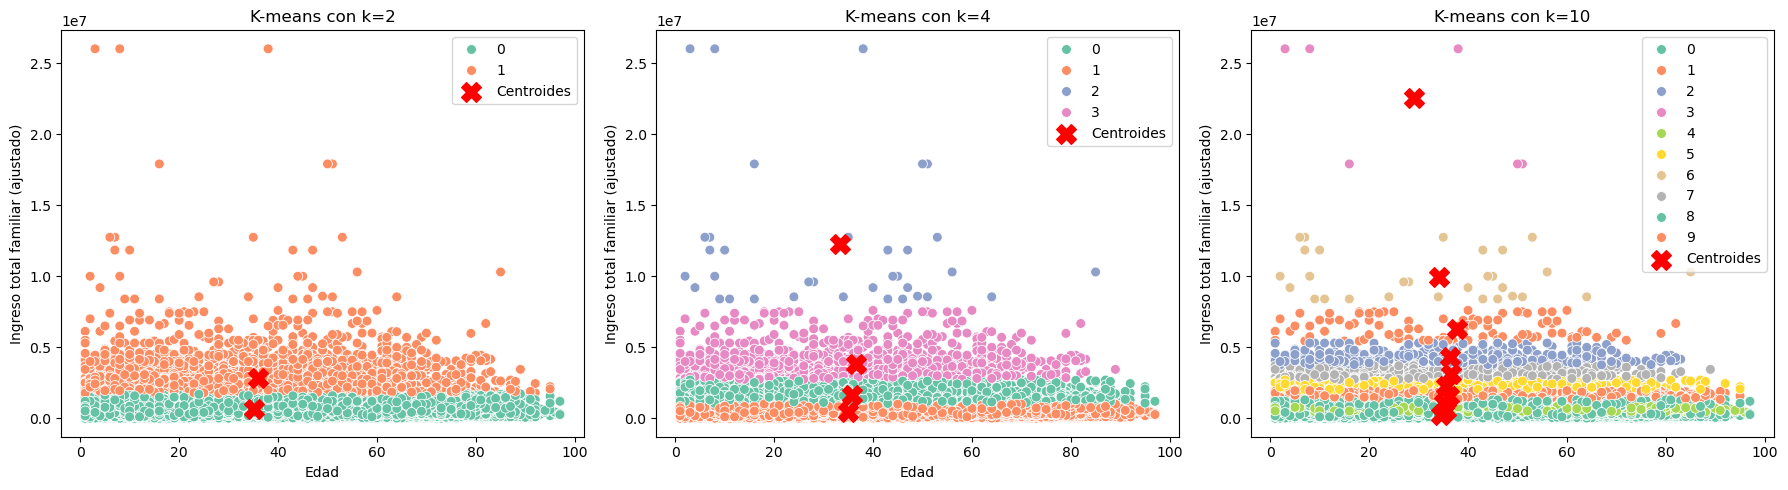

Matriz de confusión pobres/no pobres vs clusters (k=2):
[[17628  3093]
 [ 2848     0]]

📌 Observación: Si los clusters no coinciden bien con los indicadores de pobreza, el algoritmo no logra separar completamente pobres y no pobres solo usando edad e ingreso.


In [21]:
# ===============================================================
# Cluster — K-means con edad e ingreso familiar
# ===============================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables para clustering
X = hogares_final_unida[['ch06', 'itf_ajustado']].dropna()

# Para comparación con pobreza
if 'pobre' in hogares_final_unida.columns:
    y_pobre = hogares_final_unida.loc[X.index, 'pobre']

# Definir valores de k
k_values = [2, 4, 10]

plt.figure(figsize=(18,5))

for i, k in enumerate(k_values, 1):
    # Ejecutar K-means
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Graficar
    plt.subplot(1, len(k_values), i)
    sns.scatterplot(
        x=X['ch06'], y=X['itf_ajustado'], 
        hue=clusters, palette='Set2', s=50, legend='full'
    )
    plt.scatter(
        kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
        color='red', marker='X', s=200, label='Centroides'
    )
    plt.title(f'K-means con k={k}')
    plt.xlabel('Edad')
    plt.ylabel('Ingreso total familiar (ajustado)')
    plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Comentario sobre separación de pobres/no pobres con k=2
# ---------------------------------------------------------------
if 'pobre' in hogares_final_unida.columns:
    kmeans2 = KMeans(n_clusters=2, n_init=20, random_state=42)
    clusters2 = kmeans2.fit_predict(X)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_pobre, clusters2)
    print("Matriz de confusión pobres/no pobres vs clusters (k=2):")
    print(cm)
    print("\n📌 Observación: Si los clusters no coinciden bien con los indicadores de pobreza, el algoritmo no logra separar completamente pobres y no pobres solo usando edad e ingreso.")


b. Grafique alguna medida de disimilitud para k=1 hasta k=10. Usando la inspección visual de Elbow ¿cuál sería el número óptimo de clusters en su región? ¿Dicha cantidad de grupos nos ayudaría a distinguir entre pobres y no pobres o entre distintas clases socioeconómicas? 

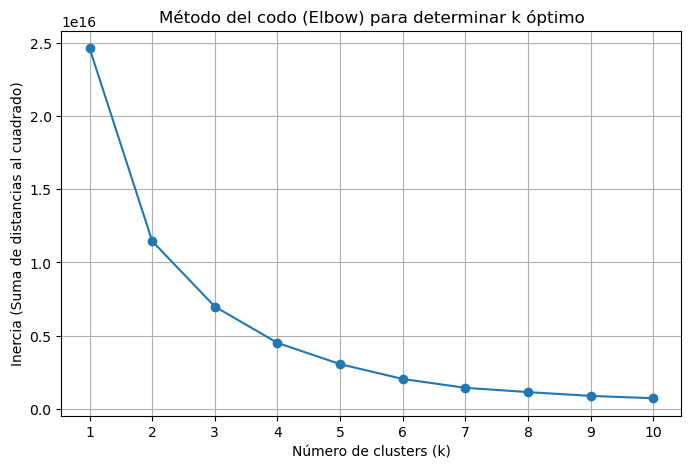

📌 Observación:
- El punto donde la disminución de la inercia comienza a suavizarse indica el número óptimo de clusters.
- Este número de grupos refleja patrones de edad e ingreso, pero no necesariamente coincide con pobres/no pobres.
- Puede ayudar a identificar distintas clases socioeconómicas o subgrupos etarios con ingresos similares, pero la separación exacta por pobreza requiere más variables.


In [22]:
# ===============================================================
# Método del codo (Elbow method) para determinar k óptimo
# ===============================================================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Variables a usar: edad e ingreso familiar ajustado
X = hogares_final_unida[['ch06', 'itf_ajustado']].dropna()

# Calcular inercia para k=1 hasta k=10
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Graficar Elbow
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.title('Método del codo (Elbow) para determinar k óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias al cuadrado)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# Interpretación
# ---------------------------------------------------------------
print("📌 Observación:")
print("- El punto donde la disminución de la inercia comienza a suavizarse indica el número óptimo de clusters.")
print("- Este número de grupos refleja patrones de edad e ingreso, pero no necesariamente coincide con pobres/no pobres.")
print("- Puede ayudar a identificar distintas clases socioeconómicas o subgrupos etarios con ingresos similares, pero la separación exacta por pobreza requiere más variables.")


6.	Cluster jerárquico: Utilizando las variables mencionadas arriba, realicen un análisis de clustering jerárquico. Generen un dendograma y expliquen brevemente qué es un dendograma.

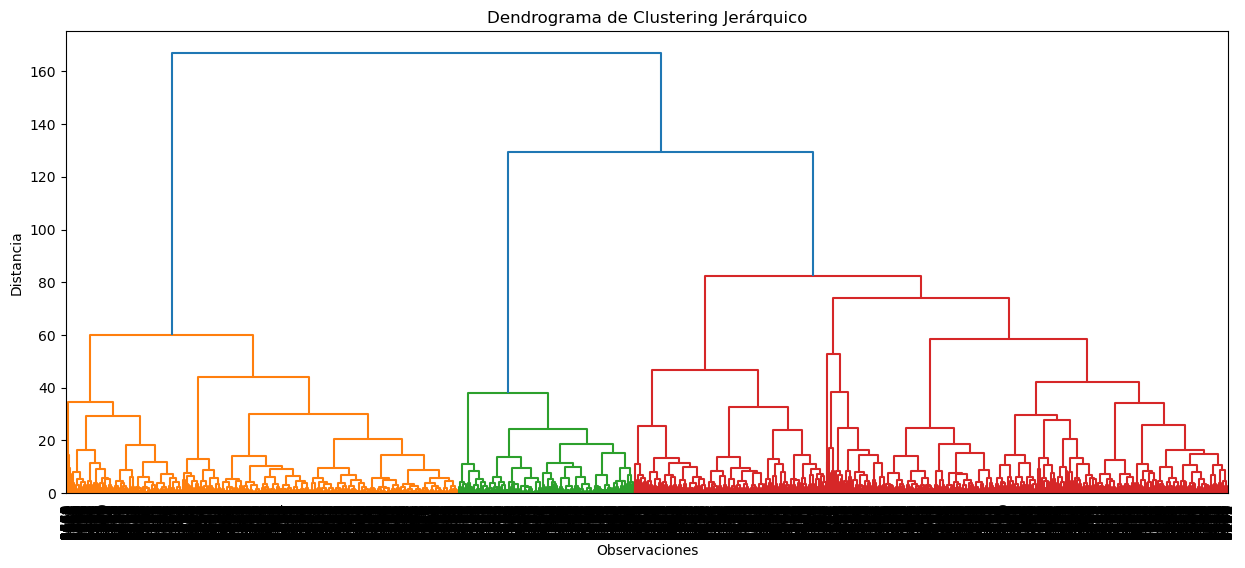

📌 Dendrograma:
- Un dendrograma es un gráfico que muestra cómo se agrupan las observaciones en un clustering jerárquico.
- Cada bifurcación representa la unión de dos clusters y la altura indica la distancia o disimilitud entre ellos.
- Cortando el dendrograma a cierta altura, se puede obtener un número deseado de clusters.


In [23]:
# ===============================================================
# 🔹 Clustering jerárquico y dendrograma
# ===============================================================

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Variables seleccionadas
variables = ['ch06', 'edad2', 'educ', 'itf_ajustado', 'ix_tot', 'horastrab']
X = hogares_final_unida[variables].dropna()

# Estandarizar variables para clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering jerárquico con método de enlace 'ward'
Z = linkage(X_scaled, method='ward')

# Graficar dendrograma
plt.figure(figsize=(15, 6))
dendrogram(Z, truncate_mode='level', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

# ---------------------------------------------------------------
# 🔹 Explicación breve
# ---------------------------------------------------------------
print("📌 Dendrograma:")
print("- Un dendrograma es un gráfico que muestra cómo se agrupan las observaciones en un clustering jerárquico.")
print("- Cada bifurcación representa la unión de dos clusters y la altura indica la distancia o disimilitud entre ellos.")
print("- Cortando el dendrograma a cierta altura, se puede obtener un número deseado de clusters.")


7.	(Opcional) Cluster k-moda: Implemente cluster k-moda con k=2, k=4 y k=10 y todas las variables dummies de la EPH que tiene en su base de datos limpias (excepto la categorica pobre y no pobre). ¿Puede el algoritmo con k=2 separar correctamente a las personas pobres y no pobres en su región?

In [ ]:
# Instalar kmodes si no está instalado
!pip install kmodes


In [ ]:
# ===============================================================
#  Cluster k-modes sobre variables categóricas/dummies
# ===============================================================

from kmodes.kmodes import KModes
import pandas as pd

# Filtrar variables categóricas/dummies (excluyendo 'pobre')
# Supongamos que tus dummies están en columnas que terminan en '_d' o similares
# o que son de tipo object/categorica
categorical_vars = hogares_final_unida.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir la variable 'pobre'
if 'pobre' in categorical_vars:
    categorical_vars.remove('pobre')

X_cat = hogares_final_unida[categorical_vars].fillna('NA')  # reemplazar NaN con 'NA'

# Función para ejecutar k-modes y mostrar resultados
def run_kmodes(X, k):
    km = KModes(n_clusters=k, init='Huang', n_init=20, verbose=1, random_state=42)
    clusters = km.fit_predict(X)
    print(f"\n✅ Clusters k-modes con k={k}:")
    # Mostrar tabla de frecuencia por cluster
    cluster_counts = pd.Series(clusters).value_counts().sort_index()
    print(cluster_counts)
    return clusters

# k=2
clusters_2 = run_kmodes(X_cat, k=2)
# Comparar con variable pobre
if 'pobre' in hogares_final_unida.columns:
    print("\n💡 Contingencia clusters k=2 vs pobres/no pobres:")
    print(pd.crosstab(clusters_2, hogares_final_unida['pobre']))

# k=4
clusters_4 = run_kmodes(X_cat, k=4)

# k=10
clusters_10 = run_kmodes(X_cat, k=10)
